# Market Prediction:
Factors for predictions --> 
- percent increase over 5 days?
- Increase tomorrow or not

Increase and Target columns added for learning


In [38]:
# imports
import yfinance as yf
import pandas as pd
import os
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [20]:
# Global Vars
config = ["^GSPC", "NVDA"]
s = "2022-01-01"
e = date.today() - timedelta(days=1)
e = e.strftime('%Y-%m-%d')
override = True

In [29]:
# get file(s)
if os.path.exists("stock.csv") and not override:
    stock = pd.read_csv("stock.csv", index_cols=0)
else:
    stock = yf.download(config[1], start=s, end=e)
    # stock.index = pd.to_datetime(stock.index)
    # Gets rid of Ticker index
    stock.columns = stock.columns.get_level_values(0)
    stock.convert_dtypes()
    stock.to_csv("stock.csv")
    

[*********************100%***********************]  1 of 1 completed


In [30]:
stock.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2022-01-03,30.070990,30.660010,29.735547,29.765498,391547000
2022-01-04,29.241369,30.417413,28.301932,30.226730,527154000
2022-01-05,27.558168,29.367160,27.487287,28.900935,498064000
2022-01-06,28.131212,28.390781,27.020061,27.594105,454186000
2022-01-07,27.201761,28.374812,27.012076,28.094278,409939000


Text(1.0, 1.0, 'NVDA Close Price')

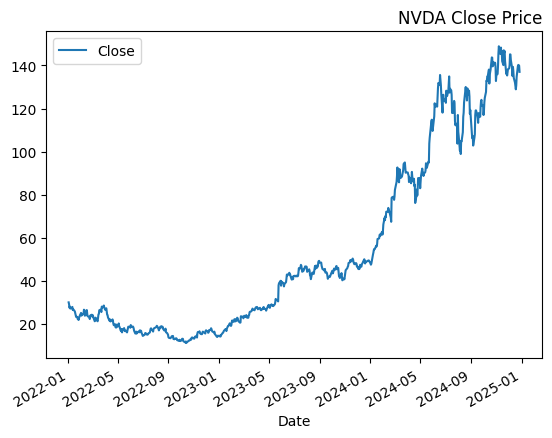

In [41]:
stock.plot.line(y="Close", use_index=True)
plt.title("NVDA Close Price", loc="Right")

In [54]:
stock["Week_Increase"] = (stock["Close"] - stock["Close"].shift(4))/stock["Close"] * 100
stock["Target"] = (stock["Week_Increase"] > 0).astype(int)
stock.tail(20)

Price,Close,High,Low,Open,Volume,Week_Increase,Target
Date,,,,,,,
2024-11-29,138.240479,139.340409,136.040633,136.770579,141863200,-2.676306,0
2024-12-02,138.620453,140.440320,137.810511,138.820436,171682800,1.882707,1
2024-12-03,140.250336,140.530315,137.940497,138.250473,164414000,2.381290,1
2024-12-04,145.130005,145.779954,140.280333,141.990222,231224300,6.752106,1
2024-12-05,145.059998,146.539993,143.949997,145.110001,172621200,4.701171,1
2024-12-06,142.440002,145.699997,141.309998,144.600006,188505600,2.681515,1
2024-12-09,138.809998,139.949997,137.130005,138.970001,189308600,-1.037633,0
2024-12-10,135.070007,141.820007,133.789993,139.009995,210020900,-7.447988,0
2024-12-11,139.309998,140.169998,135.210007,137.360001,184905200,-4.127486,0
